## Week 1 (11/1/2020 - 11/7/2020)

In this section, I gathered data about the stock market in relation to the week of the election in an attempt to find a repeatable pattern that I could utilize to trade. I gathered the data using yahoo finance's API, and I used the S&P 500 ETF, SPY, as a means to measure the rise and fall of the S&P 500 index. Unfortunately, the ETF was not created until 1993, so I was a bit limited, but I still feel that I found a significant correlation.

In [11]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web

def create_frame(year, mon, day):
    start = dt.datetime(year, mon, day)
    end = dt.datetime(year, mon, day+1)
    df = web.DataReader('SPY', 'yahoo', start, end)
    return df

def change_and_append(data, change_list, gain_list):
    op = data["Open"][0]
    cl = data["Close"][1]
    p_change = (cl - op) / op * 100
    change_list.append(p_change)
    if(p_change >= 0.000000000001):
        gain_list.append("Gain")
    else:
        gain_list.append("Loss")

df1 = create_frame(1996, 11, 4)
percent_change = []
gain_loss = []
year = []

change_and_append(df1, percent_change, gain_loss)
year.append(1996)

### Process

In the above code, I imported data about the S&P 500 performance from the Monday before the election to the Tuesday of the election. The percent change list is the percent change of the S&P 500 from the open on Monday to the close on Tuesday spanning from 1996 to 2016. The gain loss list contains a value of 1 for a year where the S&P gained value and a 0 for a year where the S&P lost value. 

I initially imported the data from the entire week of the election, but upon inspection, I noticed that the only real correlation was that the S&P had a tendency to make gains from the open on Monday to the close on Tuesday.


In [12]:
df2 = create_frame(2000, 11, 6)
change_and_append(df2, percent_change, gain_loss)
year.append(2000)

In [13]:
df3 = create_frame(2004, 11, 1)
change_and_append(df3, percent_change, gain_loss)
year.append(2004)

In [14]:
df4 = create_frame(2008, 11, 3)
change_and_append(df4, percent_change, gain_loss)
year.append(2008)

In [15]:
df5 = create_frame(2012, 11, 5)
change_and_append(df5, percent_change, gain_loss)
year.append(2012)

In [16]:
df6 = create_frame(2016, 11, 7)
change_and_append(df6, percent_change, gain_loss)
year.append(2016)

In [17]:
result = {'Election': year, 'Percent Change': percent_change, 'Gain or Loss': gain_loss}
df = pd.DataFrame(result)
df

,Election,Percent Change,Gain or Loss
0,1996,1.105217,Gain
1,2000,0.414757,Gain
2,2004,-0.008801,Loss
3,2008,3.750780,Gain
4,2012,1.139017,Gain
5,2016,2.666026,Gain


### Analysis Part 1

Here you can clearly see that out of the 6 election years, the S&P made gains in all but 2004. Furthermore, the percent gains were all much bigger than the percent loss in 2004.

In [18]:
print(df.drop(columns='Election').describe())
print(' ')
avg_win = df.drop(index=2)['Percent Change'].mean()
avg_loss = df['Percent Change'].min()
reward_risk_ratio = avg_win / avg_loss * (-1)
print('Reward to Risk Ratio:', reward_risk_ratio)

       Percent Change
count        6.000000
mean         1.511166
std          1.425852
min         -0.008801
25%          0.587372
50%          1.122117
75%          2.284274
max          3.750780
 
Reward to Risk Ratio: 206.24277598719814


### Analysis Part 2

Here you can see that on average, the S&P gains 1.511166 percent from the Monday morning of the election to the afternoon of Election day. The reward to risk ratio that I calculated and printed below is essentially a measure the profitability of this strategy over time. For comparison, a strategy with a reward risk ratio of 5 would mean that if you traded with a position size that yielded a maximum loss of 100 dollars when the strategy failed, then you could lose 5 out of every 6 times and come away break even(one win = 500, 5 losses = -500). Winning two out of every 6 times, a win rate of 33 percent, would result in a 400 dollar profit in this scenario when carried out 6 times.

       Percent Change
count        5.000000
mean         1.815159
std          1.359496
min          0.414757
25%          1.105217
50%          1.139017
75%          2.666026
max          3.750780


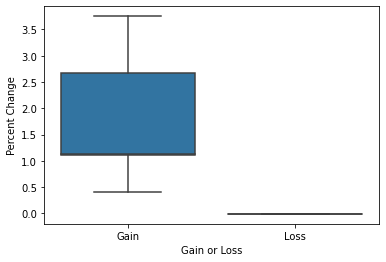

In [21]:
import seaborn as sns

sns.boxplot(x="Gain or Loss", y="Percent Change", data=df)

print(df.drop(index=2, columns=['Election', 'Gain or Loss']).describe())

### Analysis Part 3

To better illustrate the significance of the reward to risk ratio, I showed the statistics for the initial table without the year in which the S&P lost value, and I did a box plot of percent change in years where the S&P gained versus lost. As you can see, the S&P gained much more than it lost in this dataset.

### My Action

Since the requirements of this project were to place a minimum of three trades a week, I decided to simulate trading the S&P 500 ETF through individually purchasing 5 of the most high performing stocks from the S&P 500 that each belonged to their own sector. To find these stocks I used finviz.com's stock screener(See: https://finviz.com/screener.ashx?v=111&f=idx_sp500,ta_perf_ytd50Afo,ta_perf2_26w50o&ft=4). The thought process behind choosing top performing stocks is similar to that of Newton's first law of motion. If the price of a stock is going up, it will continue to go up until bad news about the company comes out. The reason I chose different sectors is to reduce risk through diversification. Stocks in a particular sector tend to move together, so if you were to purchase 2 stocks from the same sector and the sector received negative news, then both your stocks would likely go down. However, if you were to purchase one stock from a different sector and one from the sector that received the negative news, then only half of your stocks will go down, thus, reducing your risk. 

The stocks I ended up trading were AAPL, ALGN, ETSY, FCX, FDX.

## Week 2 (11/8/2020 - 11/14/2020)

The recent news of a 90% effective coronavirus vaccine inspired to look into a group of stocks that I felt could increase dramatically if/when the country reopens, travel stocks. In the following section I gathered data on 3 such stocks in an attempt to analyze their value, given that the country is on the verge of reopening. Because I'm not a finance major, I did not dig deep into fundamental data. I simply use the price as a reference to form an idea about the current price. I used to different time frames, 2019 and 2015-2019, to compare the prices. The reason why I did this is to account for the possibility of recent improvement in the stock price due to positive company news.

In [58]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns

def create_5yr_frame(ticker):
    start = dt.datetime(2015, 1, 1)
    end = dt.datetime(2020, 1, 1)
    df = web.DataReader(ticker, 'yahoo', start, end)
    return df

def create_2019_frame(ticker):
    start = dt.datetime(2019, 1, 1)
    end = dt.datetime(2020, 1, 1)
    df = web.DataReader(ticker, 'yahoo', start, end)
    return df

def print_percent_diff(name, data, curr, years):
    mean = data['Open'].mean()
    current = curr['Open'][0]
    diff = (mean - current) / mean * 100
    high = data['High'].max()
    high_diff = (high - current) / high * 100
    print(name, 'stock opened at a price', diff, 'percent below its', years, 'year mean and', high_diff, \
          'percent below its', years, 'year high on 11/9')

RCL = create_5yr_frame('RCL')
RCL_2019 = create_2019_frame('RCL')
UAL = create_5yr_frame('UAL')
UAL_2019 = create_2019_frame('UAL')
LUV = create_5yr_frame('LUV')
LUV_2019 = create_2019_frame('LUV')

              High          Low         Open        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    101.475373    99.227782   100.380072   100.362146  1.941558e+06
std      19.209759    18.975674    19.109292    19.065215  1.182298e+06
min      66.510002    64.209999    64.989998    65.480003  4.886000e+05
25%      82.782499    80.792500    81.640001    81.857498  1.270750e+06
50%     105.880001   103.509998   104.555000   104.389999  1.682000e+06
75%     118.682503   115.920002   117.267500   117.165001  2.265350e+06
max     135.649994   133.750000   134.550003   134.979996  2.062080e+07

                 High        Low       Open  Close    Volume
Date                                                        
2020-11-09  78.860001  71.239998  73.269997  75.43  27736800

Royal Carribean Cruises stock opened at a price 27.007427391534605 percent below its 5 year mean and 45.98599340964265 percent below its 5 year high on 11/9


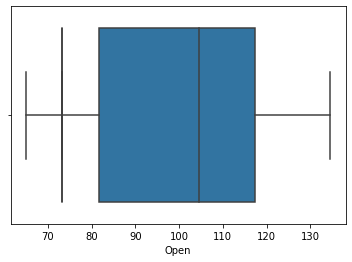

In [59]:
print(RCL.drop(columns='Adj Close').describe())
start = dt.datetime(2020, 11, 8)
end = dt.datetime(2020, 11, 9)
curr_RCL = web.DataReader('RCL', 'yahoo', start, end)
print('')
print(curr_RCL.drop(columns='Adj Close'))
print('')
print_percent_diff('Royal Carribean Cruises', RCL, curr_RCL, 5)

sns.boxplot(x='Open', data=RCL)
sns.boxplot(x='Open', data=curr_RCL)

             High         Low        Open       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean   116.632897  114.219246  115.461468  115.541190  1.586014e+06
std      7.392829    7.574492    7.478359    7.506417  6.774315e+05
min     97.309998   91.879997   94.800003   92.550003  5.584000e+05
25%    110.947500  108.505001  110.110003  109.747499  1.089300e+06
50%    117.099998  115.114998  116.064999  116.020000  1.450500e+06
75%    121.810001  119.622501  120.992502  120.947502  1.939550e+06
max    134.600006  133.270004  134.300003  134.169998  4.819900e+06

                 High        Low       Open  Close    Volume
Date                                                        
2020-11-09  78.860001  71.239998  73.269997  75.43  27736800

Royal Carribean Cruises stock opened at a price 36.541603180349696 percent below its 1 year mean and 45.56464092080553 percent below its 1 year high on 11/9


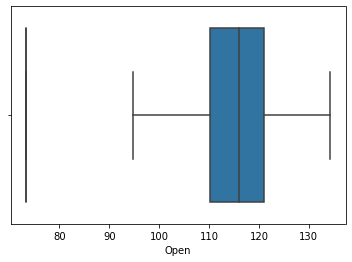

In [57]:
print(RCL_2019.drop(columns='Adj Close').describe())
print('')
print(curr_RCL.drop(columns='Adj Close'))
print('')
print_percent_diff('Royal Carribean Cruises', RCL_2019, curr_RCL, 1)

sns.boxplot(x='Open', data=RCL_2019)
sns.boxplot(x='Open', data=curr_RCL)

### RCL Analysis

In the above two sections I did boxplots to compare the current price with five year price data and 2019 year price data. The single line running down the left is the current price, and as you can see, the price is definitely on the low side for both the five year data and one year data.

              High          Low         Open        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean     70.118696    68.365588    69.248831    69.221001  4.425857e+06
std      14.043857    13.946583    14.003178    13.987598  3.148102e+06
min      39.060001    37.410000    38.820000    37.750000  7.711000e+05
25%      58.830002    57.262499    57.959999    58.012500  2.689475e+06
50%      69.375000    67.550003    68.475002    68.404999  3.875500e+06
75%      82.517500    80.959999    81.735001    81.734999  5.211600e+06
max      97.849998    95.959999    97.669998    96.699997  6.782620e+07

                 High        Low       Open  Close    Volume
Date                                                        
2020-11-09  44.060001  39.130001  41.900002  41.32  60942600

United Airlines stock opened at a price 39.49356166087331 percent below its 5 year mean and 57.17935393022982 percent below its 5 year high on 11/9


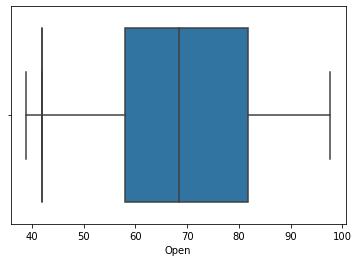

In [60]:
print(UAL.drop(columns='Adj Close').describe())
start = dt.datetime(2020, 11, 8)
end = dt.datetime(2020, 11, 9)
curr_UAL = web.DataReader('UAL', 'yahoo', start, end)
print('')
print(curr_UAL.drop(columns='Adj Close'))
print('')
print_percent_diff('United Airlines', UAL, curr_UAL, 5)

sns.boxplot(x='Open', data=UAL)
sns.boxplot(x='Open', data=curr_UAL)

             High         Low        Open       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean    87.765199   86.002421   86.878730   86.825754  2.660036e+06
std      3.948831    4.104594    4.019835    4.015849  1.208601e+06
min     78.730003   77.019997   77.379997   77.489998  7.711000e+05
25%     84.904999   82.877499   83.635000   83.905003  1.934225e+06
50%     88.445000   86.635002   87.439999   87.480000  2.344750e+06
75%     90.205002   88.807503   89.477501   89.432501  3.126425e+06
max     96.029999   94.239998   95.379997   95.279999  1.084060e+07

                 High        Low       Open  Close    Volume
Date                                                        
2020-11-09  44.060001  39.130001  41.900002  41.32  60942600

Royal Carribean Cruises stock opened at a price 51.77185302931291 percent below its 1 year mean and 56.367799585027036 percent below its 1 year high on 11/9


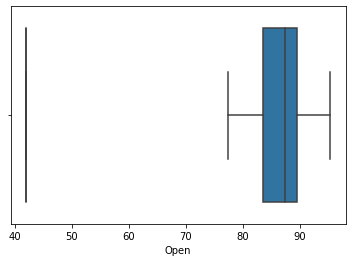

In [61]:
print(UAL_2019.drop(columns='Adj Close').describe())
print('')
print(curr_UAL.drop(columns='Adj Close'))
print('')
print_percent_diff('United Airlines', UAL_2019, curr_UAL, 1)

sns.boxplot(x='Open', data=UAL_2019)
sns.boxplot(x='Open', data=curr_UAL)

### UAL Analysis

Again, the current price is between the low and 25 percentile on the 5 year and below the 2019 lows. So, in comparison to prior price data, I'd say the stock is undervalued.

              High          Low         Open        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean     50.237432    49.112997    49.680421    49.672909  5.835484e+06
std       8.025311     7.998995     8.006836     7.999330  3.187755e+06
min      32.889999    31.360001    32.470001    32.360001  1.098400e+06
25%      43.292500    42.200001    42.804999    42.804999  3.940200e+06
50%      51.945000    50.914999    51.415001    51.365000  5.204050e+06
75%      56.257501    54.847499    55.637500    55.527499  7.001700e+06
max      66.989998    65.980003    66.500000    66.290001  4.382490e+07

                 High        Low       Open      Close    Volume
Date                                                            
2020-11-09  49.470001  43.790001  46.849998  43.889999  30140200

Southwest Airlines stock opened at a price 5.697260183455276 percent below its 5 year mean and 30.064188732480662 percent below its 5 year high on 11/9


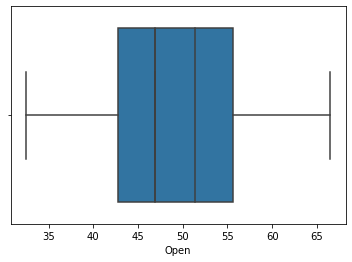

In [62]:
print(LUV.drop(columns='Adj Close').describe())
start = dt.datetime(2020, 11, 8)
end = dt.datetime(2020, 11, 9)
curr_LUV = web.DataReader('LUV', 'yahoo', start, end)
print('')
print(curr_LUV.drop(columns='Adj Close'))
print('')
print_percent_diff('Southwest Airlines', LUV, curr_LUV, 5)

sns.boxplot(x='Open', data=LUV)
sns.boxplot(x='Open', data=curr_LUV)

             High         Low        Open       Close        Volume
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean    53.627183   52.561746   53.067897   53.092937  4.018755e+06
std      2.656920    2.752678    2.723317    2.692945  1.883365e+06
min     46.570000   44.610001   45.990002   45.610001  1.098400e+06
25%     51.715001   50.657500   51.119999   51.160000  2.808275e+06
50%     53.420000   52.340000   52.820002   52.885000  3.580650e+06
75%     55.352500   54.085000   54.822501   54.722501  4.699400e+06
max     58.770000   57.889999   58.500000   58.290001  1.530820e+07

                 High        Low       Open      Close    Volume
Date                                                            
2020-11-09  49.470001  43.790001  46.849998  43.889999  30140200

Royal Carribean Cruises stock opened at a price 11.716873550191808 percent below its 1 year mean and 20.28246025318503 percent below its 1 year high on 11/9


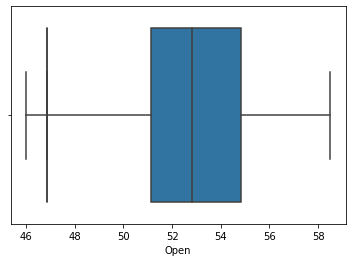

In [63]:
print(LUV_2019.drop(columns='Adj Close').describe())
print('')
print(curr_LUV.drop(columns='Adj Close'))
print('')
print_percent_diff('Royal Carribean Cruises', LUV_2019, curr_LUV, 1)

sns.boxplot(x='Open', data=LUV_2019)
sns.boxplot(x='Open', data=curr_LUV)

### LUV Analysis

In this case, the current price is on the low side for the 5 year, but not nearly as low as UAL or RCL. Compared to the one year data, the current price is near the lows however. I'd still say this is undervalued, but I don't expect as large of an upside in a possible trade as the other two. 

### My Action

Since the coronavirus situation is fluid to say the least, I have decided to allocate a small amount of capital towards these three stocks to adjust for risk. I plan to keep them in my portfolio for the remainder of this game unless news comes out that the vaccine is not going to work out. I have no doubt that these companies are undervalued based off the price history, but if the vaccine falls through, the uncertainty surrounding the pandemic will likely lead to a price decline in my opinion.

## Week 3 (11/15/2020 - 11/21/2020)

For this section, I decided to allocate money towards the best performing S&P stocks from the past ten years. I chose the ten year time frame because I wanted to find well-established companies that have continually outperformed, rather than relatively new ones whose growth may begin to slow. Additionally, the stocks had to have current price trends that were bullish. To show the growth I applied the Python's Lambda Function to the adjusted close price for the three stocks I chose to trade as well as SPY, and I plotted them all on the same chart to illustrate the performance.

In [20]:
import pandas as pd
import quandl
import datetime

start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,1,1)


In [21]:
avgo, oldDom, unitRent = (quandl.get("WIKI/" + s, start_date=start, end_date=end) for s in ["AVGO", "ODFL", "URI"])
stocks = pd.DataFrame({"AVGO": avgo["Adj. Close"],
                      "ODFL": oldDom["Adj. Close"],
                      "URI": unitRent["Adj. Close"]})
 
stocks.head()

,AVGO,ODFL,URI
Date,,,
2010-01-04,16.903182,12.966140,10.04
2010-01-05,17.028656,13.245029,9.93
2010-01-06,17.163093,13.488504,9.93
2010-01-07,17.055543,12.837762,9.80
2010-01-08,17.181018,13.014835,9.58


In [23]:
import numpy as np
import pandas_datareader.data as web    
SPY = web.DataReader('SPY', 'yahoo', start, end)
 
SPYDAT = SPY.loc[start:end]
 
stocks = stocks.join(SPYDAT.loc[:, "Adj Close"]).rename(columns={"Adj Close": "SPY"})
stocks.head()

,AVGO,ODFL,URI,SPY,SPY
Date,,,,,
2010-01-04,16.903182,12.966140,10.04,91.475693,91.475693
2010-01-05,17.028656,13.245029,9.93,91.717857,91.717857
2010-01-06,17.163093,13.488504,9.93,91.782425,91.782425
2010-01-07,17.055543,12.837762,9.80,92.169884,92.169884
2010-01-08,17.181018,13.014835,9.58,92.476562,92.476562


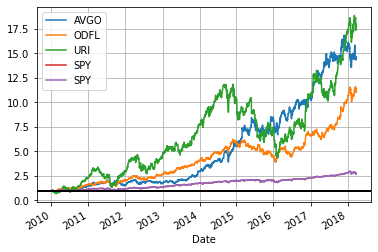

In [24]:
stock_return = stocks.apply(lambda x: x / x[0])
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

### My Action/Analysis Summary

As you can see by the chart, AVGO, ODFL, and URI all have and continued to grow at a rate that is much higher than SPY over the last ten years. Because of this, I decided to allocate a decent portion of money to each stock with the intent of holding as long as they continue to make gains.

## Week 4 (11/22/2020 - 11/28/2020)

This week I simply did some portfolio management for my trades. I decided to sell the stocks that weren't performing as well as others. I initially was going to keep my undervalued travel stocks to the end of the project, but after all except RCL moving less than I hoped, I decided to sell them with the risk of another possible shutdown growing as covid cases continue to rise. Additionally, I sold AVGO because it was not moving much, and I eventually sold ODFL after initially giving it a little extra time due to prior experience I have with technical analysis. I kept the two best performing stocks in my portfolio RCL and URI. (I sold these the next week to lock in gains after a small price drop.)

## Week 5 (11/29/2020 - 12/5/2020)

This week I decided to take a stab at shorter term trading again. In week 1, I had success by finding an event(The Election) in which I could isolate data around, so I attempted to do a similar thing here. After exploring finviz.com's stock screener, I decided to see if I could find a data pattern around stocks that showed up on their top gainers list. (See https://finviz.com/screener.ashx?v=111&s=ta_topgainers&f=idx_sp500). To do this, I kept track of the top gainers as they showed up on the screener. I was only able to gather data for 6 stocks due to the requirement of using only S&P stocks and because I couldn't find anywhere online that had a record of the top gaining S&P 500 stocks. That being said, I did find a correlation that I used for my trades this week.

In [10]:
import datetime as dt
import pandas as pd
import pandas_datareader.data as web

def create_frame(ticker, day):
    start = dt.datetime(2020, 11, day)
    end = dt.datetime(2020, 11, day+5)
    df = web.DataReader(ticker, 'yahoo', start, end)
    df = df.drop(columns={'Adj Close', 'Volume', 'High', 'Low'})
    return df

def change_and_append(data, change_list, gain_list):
    first = data["Close"][1]
    second = data["Close"][3]
    p_change = (second - first) / first * 100
    change_list.append(p_change)
    if(p_change >= 0.000000000001):
        gain_list.append("Gain")
    else:
        gain_list.append("Loss")
        
change_list = []
gain_list = []

### Process

Here, I created a function that inputted the data from the 6 stocks, and I also created a function to organize the data that I found a correlation with to map my trades around. The trade was to short sell the day after the stock showed up on finviz's top gainers list and cover two days later, both at the close. The first row of data for each frame below is the day the stock showed up on the top gainer list.

In [11]:
LB = create_frame('LB', 19)
change_and_append(LB, change_list, gain_list)
LB

,Open,Close
Date,,
2020-11-19,39.340000,39.549999
2020-11-20,39.750000,39.970001
2020-11-23,40.500000,39.980000
2020-11-24,40.439999,39.689999


In [12]:
OXY = create_frame('OXY', 23)
change_and_append(OXY, change_list, gain_list)
OXY

,Open,Close
Date,,
2020-11-23,13.850000,15.760000
2020-11-24,16.969999,16.780001
2020-11-25,16.650000,16.719999
2020-11-27,16.719999,16.559999


In [13]:
APA = create_frame('APA', 23)
change_and_append(APA, change_list, gain_list)
APA

,Open,Close
Date,,
2020-11-23,11.67,12.86
2020-11-24,13.56,14.04
2020-11-25,13.80,14.12
2020-11-27,14.13,13.92


In [14]:
FANG = create_frame('FANG', 23)
change_and_append(FANG, change_list, gain_list)
FANG

,Open,Close
Date,,
2020-11-23,40.730000,44.490002
2020-11-24,46.529999,47.139999
2020-11-25,46.310001,45.389999
2020-11-27,44.610001,43.520000


In [15]:
EOG = create_frame('EOG', 23)
change_and_append(EOG, change_list, gain_list)
EOG

,Open,Close
Date,,
2020-11-23,46.130001,50.380001
2020-11-24,52.139999,54.419998
2020-11-25,53.880001,53.000000
2020-11-27,52.090000,51.430000


In [16]:
VLO = create_frame('VLO', 23)
change_and_append(VLO, change_list, gain_list)
VLO

,Open,Close
Date,,
2020-11-23,51.799999,56.090000
2020-11-24,58.130001,58.490002
2020-11-25,57.419998,56.430000
2020-11-27,55.930000,56.619999


In [17]:
top_gainers = {'Percent Change': change_list, 'Gain or Loss': gain_list}
df = pd.DataFrame(top_gainers)
print(df)
print('')
print(df.describe())

   Percent Change Gain or Loss
0       -0.700532         Loss
1       -1.311092         Loss
2       -0.854700         Loss
3       -7.679251         Loss
4       -5.494300         Loss
5       -3.197132         Loss

       Percent Change
count        6.000000
mean        -3.206168
std          2.851071
min         -7.679251
25%         -4.920008
50%         -2.254112
75%         -0.968798
max         -0.700532


### My action/Analysis Summary

Here you can see that in short selling the close on top gainers the day after it showed up on finviz's top gainers list and covering the close two days later was profitable 100% of the time in this sample. Because of the small sample size however, I decided to try this trade very cautiously.

The stocks I ended up trading were INFO, AMD, and LNC. Note: I screwed up on INFO and AMD by forgetting to covering the close, so I ended up covering the next morning.